## Data Description
Before we dive into the story, let's understand what each column represents:

`userid`: Unique identifier for each user.  
`age`: Age of the user.  
`dob_day`, dob_year, dob_month: Date of birth components.  
`gender`: Gender of the user.  
`tenure`: How long the user has been on the platform.  
`friend_count`: Total number of friends.  
`friendships_initiated`: Number of friendships started by the user.  
`likes`: Total likes given by the user.  
`likes_received`: Total likes received by the user.  
`mobile_likes`, `mobile_likes_received`: Likes and likes received through mobile.   
`www_likes`, `www_likes_received`: Likes and likes received through website.  

## The Story: Digital Footprint and Engagement
Imagine a social media platform where users interact, connect, and share content. Our dataset provides a snapshot of users' digital lives. We'll explore how different user segments behave, how their interactions evolve over time, and potential trends.

## Hypothesis:
 - Younger users are more active on mobile than older users.
 - Users with more friends tend to give and receive more likes.
 - There's a correlation between tenure and friend count.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy

## Load Dataset

In [2]:
df = pd.read_csv('facebook_data.csv')
df.head()

,Unnamed: 0,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### Data Types

In [58]:
df.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
gender_female               bool
gender_male                 bool
dtype: object

## Clean Data

In [3]:
df.drop("Unnamed: 0", inplace=True, axis=1)

In [4]:
df.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

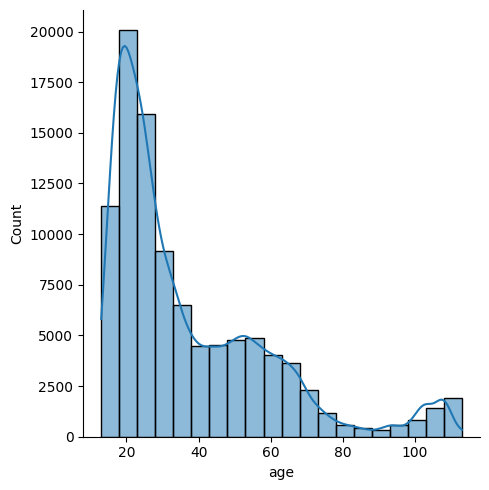

In [5]:
sns.displot(data=df, x='age', bins=20, kde=True)
plt.show()

**Conclusion:** We can see that most of the users on Facebook are young and in their 20s

### Hypothesis 1: Younger users are less active on mobile than older users.
**Null Hypothesis (H0)** - Younger users are less active on mobile  
**Alternate Hypothesis(H1)** - Younger users are more active on mobile than older users  

In [30]:
age_wise_mobile_like = df[['age', 'mobile_likes']].groupby('age').mean().reset_index()
age_wise_mobile_like.head()

,age,mobile_likes
0,13,137.128099
1,14,117.698182
2,15,150.692513
3,16,143.857745
4,17,147.370088


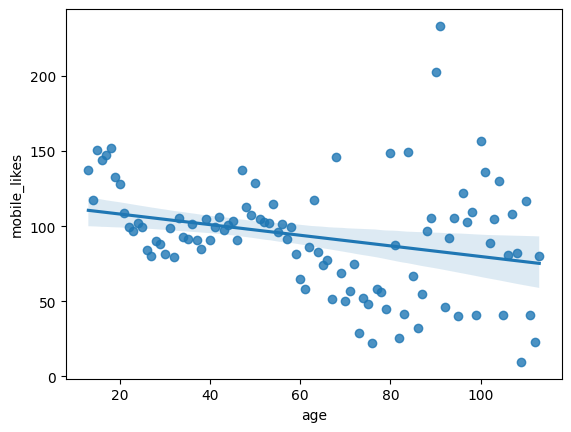

In [31]:
sns.regplot(data=age_wise_mobile_like, x='age', y='mobile_likes')
plt.show()

### Lets make 3 groups for ANOVA testing
Younger: Age less than 25  
Middle: Age between 25 - 50  
Older: Age greater than 50  
  
And we assume Alpha as - 0.05

In [43]:
young = age_wise_mobile_like[age_wise_mobile_like['age'] < 25]
middle = age_wise_mobile_like[(age_wise_mobile_like['age'] >= 25) & (age_wise_mobile_like['age'] < 50)]
old = age_wise_mobile_like[age_wise_mobile_like['age'] > 50]

f_statistics, p_value = scipy.stats.f_oneway(old['mobile_likes'], middle['mobile_likes'], young['mobile_likes'])
print(p_value)

0.0010345122333272302


**Conclusion**: We can see negative relation in Age and mobile likes, which shows that young people are more active on mobile. Which means we have enough evidence to reject Null hypothesis.  
From P Value as well, we can see it is less than 0.05 this means We can reject Null hypothesis and conclude Young users are more active on Mobile.

### Hypothesis 2: Users with more friends tend to give and receive more likes.

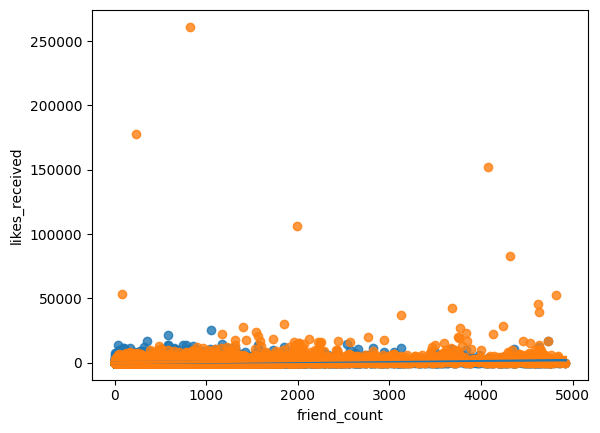

In [8]:
sns.regplot(data=df, x='friend_count', y='likes')
sns.regplot(data=df, x='friend_count', y='likes_received')
plt.show()

**Conclusion:** There is no significant evidence that users with more friends tend to give and receive more likes.

### Hypothesis 3: There's a correlation between tenure and friend count.

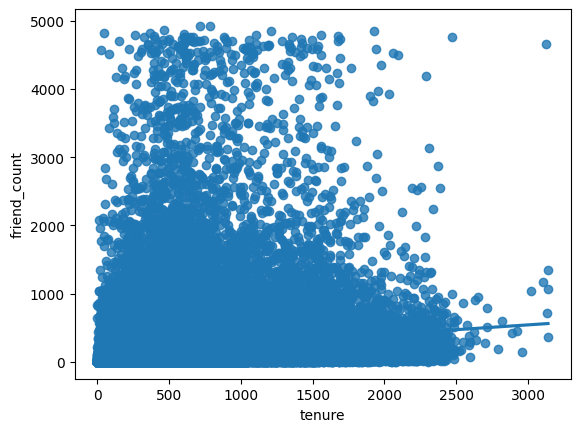

In [9]:
sns.regplot(data=df, x='tenure', y='friend_count')
plt.show()

**Conclusion:** There is no significant evidence that there's a correlation between tenure and friend count.

## Model Training
Lets create a model to predict the likes

#### One Hot Encoding for Gender

In [10]:
df = pd.get_dummies(data=df, columns=['gender'])
df.head()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,gender_female,gender_male
0,2094382,14,19,1999,11,266.0,0,0,0,0,0,0,0,0,False,True
1,1192601,14,2,1999,11,6.0,0,0,0,0,0,0,0,0,True,False
2,2083884,14,16,1999,11,13.0,0,0,0,0,0,0,0,0,False,True
3,1203168,14,25,1999,12,93.0,0,0,0,0,0,0,0,0,True,False
4,1733186,14,4,1999,12,82.0,0,0,0,0,0,0,0,0,False,True


In [11]:
data = df[['age', 'tenure', 'friend_count', 'gender_male', 'likes']]
data['tenure'].isna().sum()

np.int64(2)

**There are 2 records in tenure column with NAN values. Lets drop them.**

In [12]:
data=data.dropna()

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
X = data[['age', 'tenure', 'friend_count', 'gender_male']]
y = data['likes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.10790792158761398

This is not an acceptable Score. Lets take it to Higher degree. 

In [57]:
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.pipeline import Pipeline
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(degree=2)),('model',Ridge(alpha=10))]
pipe = Pipeline(Input)
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.1324938205308106

## Conclusion:
Linear Regression model is unable to accurately predict Facebook likes based on user age, friends count, and gender, it implies that these features may not be strong predictors of Facebook likes or that the relationship between the variables is not linear.

### Potential Reasons for Failure
**Lack of Linearity:** Linear Regression assumes a linear relationship between the independent variables (age, friends count, gender) and the dependent variable (Facebook likes). If this relationship is non-linear, the model will not perform well.  
**Irrelevant or Insufficient Features:** The provided features might not be significant predictors of Facebook likes. Other factors such as post frequency, content type, engagement metrics, or demographic information could be more influential.  
**Presence of Outliers:** Extreme values in the dataset can significantly impact the model's performance. Outliers can distort the linear relationship and reduce the model's accuracy.  
**Multicollinearity:** If there is a high correlation between the independent variables (e.g., age and friends count), it can lead to multicollinearity, which can negatively affect the model's performance.  
**Heteroscedasticity:** The assumption of constant variance in the residuals is violated, meaning the error terms have different variances. This can affect the model's accuracy and reliability.  
**Limited Data:** An insufficient amount of data can hinder the model's ability to capture the underlying patterns and relationships between the variables.  

## Next Steps
**Explore Non-linear Relationships:** Consider using non-linear models like polynomial regression, decision trees, or support vector machines.  
**Feature Engineering:** Create new features or transform existing ones to improve the model's predictive power.  
**Data Cleaning and Preprocessing:** Handle outliers, missing values, and inconsistencies in the data.  
**Model Evaluation:** Use appropriate metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), or R-squared to assess the model's performance.  
**Consider Other Factors:** Incorporate additional relevant features that might influence Facebook likes.  